<center><h1 class="list-group-item list-group-item-success">Importing Libraries</h1></center>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# feature extractoring and preprocessing data
import librosa
import os
import pandas as pd
import numpy as np
import csv
import random
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import pickle
from sklearn.preprocessing import StandardScaler
#for graph
import matplotlib.pyplot as plt
%matplotlib inline
# from lib_file import lib_path
import seaborn as sns

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

In [4]:
os.listdir('input/genres/') 

['Acrocephalus',
 'Bubo',
 'Caprimulgus',
 'Emberiza',
 'Ficedula',
 'Glaucidium',
 'Hippolais']

In [4]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [5]:
print(header)

['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']


<center><h1 class="list-group-item list-group-item-success">Converting Audio data into Numerical data</h1></center>

In [ ]:
file = open('NumericalAudioData.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'Acrocephalus Bubo Caprimulgus Emberiza Ficedula Glaucidium Hippolais'.split()
for g in genres:
    for filename in os.listdir(f'input/genres/{g}'):
        songname = f'input/genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('NumericalAudioData.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

<center><h1 class="list-group-item list-group-item-success">Loading Numerical Data</h1></center>

In [ ]:
data = pd.read_csv(filepath_or_buffer='NumericalAudioData.csv')
data.head()

In [8]:
print(data.shape)

(212, 28)


In [9]:
data["label"].value_counts()

Acrocephalus    32
Bubo            30
Caprimulgus     30
Emberiza        30
Ficedula        30
Glaucidium      30
Hippolais       30
Name: label, dtype: int64

<center><h1 class="list-group-item list-group-item-success"> Data Visualization</h1></center>

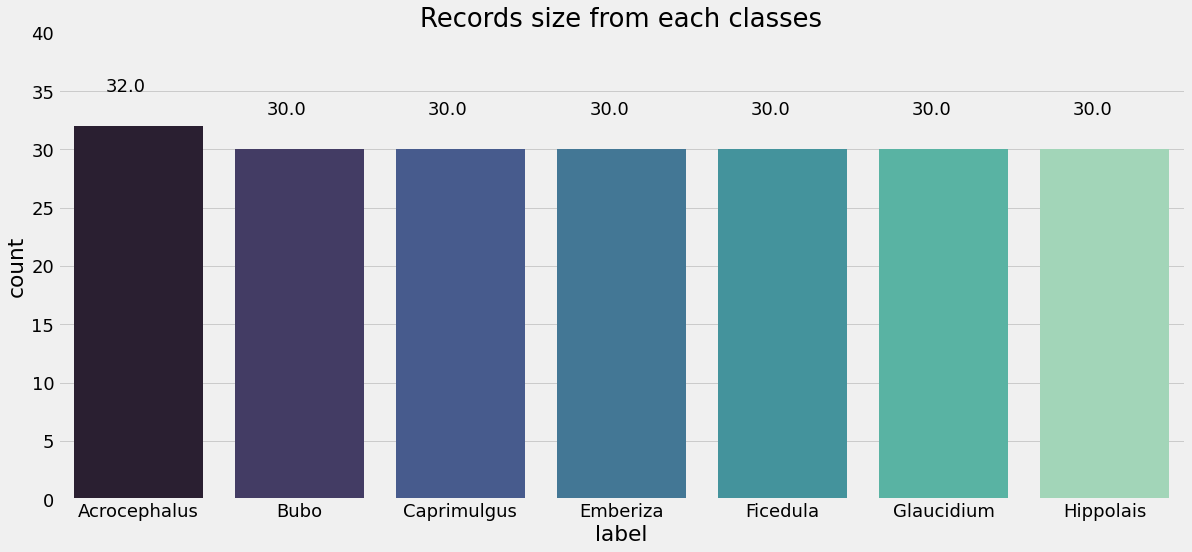

In [10]:
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.rcParams["font.size"]=18
    ax=sns.countplot(x="label",data=data, palette="mako")
    plt.title(label="Records size from each classes")
    plt.ylim(0,40)
    for p in ax.patches:
        ax.annotate((p.get_height()),(p.get_x()+0.20,p.get_height()+3))
    plt.show()

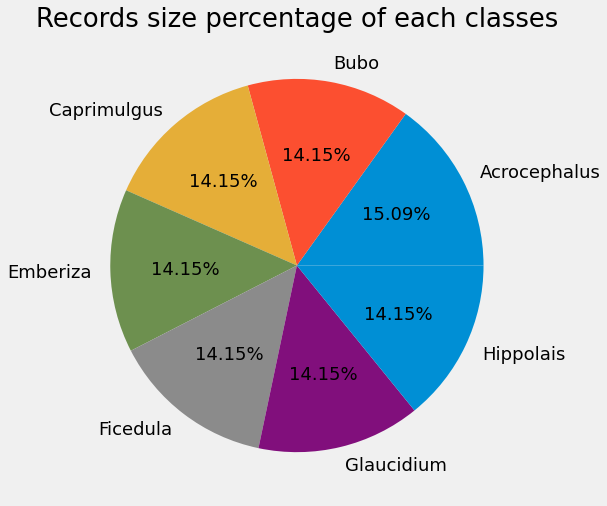

In [11]:
chart_data = dict(data['label'].value_counts())

with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.rcParams["font.size"]=18
    plt.pie(x=chart_data.values(), labels=chart_data.keys(), autopct="%.2f%%")
    plt.title(label="Records size percentage of each classes")
    plt.show()

In [12]:
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)

In [13]:
data.shape

(212, 27)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   chroma_stft         212 non-null    float64
 1   rmse                212 non-null    float64
 2   spectral_centroid   212 non-null    float64
 3   spectral_bandwidth  212 non-null    float64
 4   rolloff             212 non-null    float64
 5   zero_crossing_rate  212 non-null    float64
 6   mfcc1               212 non-null    float64
 7   mfcc2               212 non-null    float64
 8   mfcc3               212 non-null    float64
 9   mfcc4               212 non-null    float64
 10  mfcc5               212 non-null    float64
 11  mfcc6               212 non-null    float64
 12  mfcc7               212 non-null    float64
 13  mfcc8               212 non-null    float64
 14  mfcc9               212 non-null    float64
 15  mfcc10              212 non-null    float64
 16  mfcc11  

In [15]:
data.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.502483,0.020224,3237.129037,2117.486749,5409.242291,0.244127,-348.945862,37.625019,-37.518631,50.910686,...,1.714992,-3.513687,3.844687,4.299314,2.257162,-6.573679,-0.084143,1.036400,-0.174736,Acrocephalus
1,0.465670,0.013833,2502.949348,1787.289223,3902.026405,0.189671,-373.262543,73.238152,-79.227478,-0.317008,...,-8.512795,-17.542477,-2.900870,-10.538652,-3.493292,-10.240418,-4.191288,-2.552590,-4.057563,Acrocephalus
2,0.426501,0.050452,3303.225655,2091.584826,5121.044034,0.251031,-223.783859,21.731514,-27.654463,84.419662,...,10.643373,-5.745807,0.447455,0.329802,7.867748,-1.200989,5.011151,-0.741138,2.024430,Acrocephalus
3,0.356690,0.048776,3550.668385,1945.835581,5136.477274,0.281263,-257.926849,-3.342677,-46.379204,70.322067,...,18.234470,1.085349,9.517078,10.222553,11.897326,-1.330365,1.639398,-2.971843,4.528324,Acrocephalus
4,0.412810,0.030990,3496.574782,2100.141118,5275.251435,0.262247,-291.520172,8.800154,-34.394051,71.047577,...,16.485449,2.571050,8.744785,5.781470,4.265044,-0.467958,7.817402,-1.951523,2.495061,Acrocephalus


In [16]:
class_labels = data["label"].unique().tolist()
class_labels.sort()

print(class_labels)

['Acrocephalus', 'Bubo', 'Caprimulgus', 'Emberiza', 'Ficedula', 'Glaucidium', 'Hippolais']


In [17]:
oversampled = []

for label in class_labels:
    label_df = data.loc[data["label"] == label]
    oversampled_df = resample(label_df, n_samples=1000)
    oversampled.append(oversampled_df)
    
df = pd.concat(objs=oversampled, ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)

df.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.722945,0.021809,782.008349,1978.229014,1125.701526,0.006035,-523.148193,96.268906,28.690178,4.405442,...,12.035838,8.920496,9.337797,7.045212,10.037899,10.380515,12.840583,9.224757,8.849692,Bubo
1,0.434243,0.027468,1600.881218,1753.066660,2579.434403,0.105189,-249.545807,142.545990,-30.038950,-0.492821,...,-2.485001,-6.048676,2.062572,-3.262909,4.100702,1.528757,4.483550,-4.216656,1.896721,Glaucidium
2,0.546560,0.001505,3165.301823,2541.225555,6128.629608,0.214851,-606.303223,49.975445,-39.488728,-6.530748,...,-7.282796,-4.553179,-0.973836,-3.703149,1.529024,-2.320423,-1.072175,-1.310206,4.238943,Caprimulgus
3,0.603204,0.014359,3219.819285,2551.422393,6025.346899,0.152784,-503.610138,15.812575,27.213356,51.788803,...,11.002545,4.151493,13.477655,5.556241,7.734437,8.195439,6.143351,5.869843,6.933216,Emberiza
4,0.238403,0.059515,4033.487599,2006.441246,5514.816653,0.346657,-261.228577,12.840778,-27.521315,25.908644,...,26.376385,-10.839603,17.662899,-7.284698,-2.170884,9.891982,-1.822561,3.936774,10.600945,Caprimulgus


In [18]:
df.shape

(7000, 27)

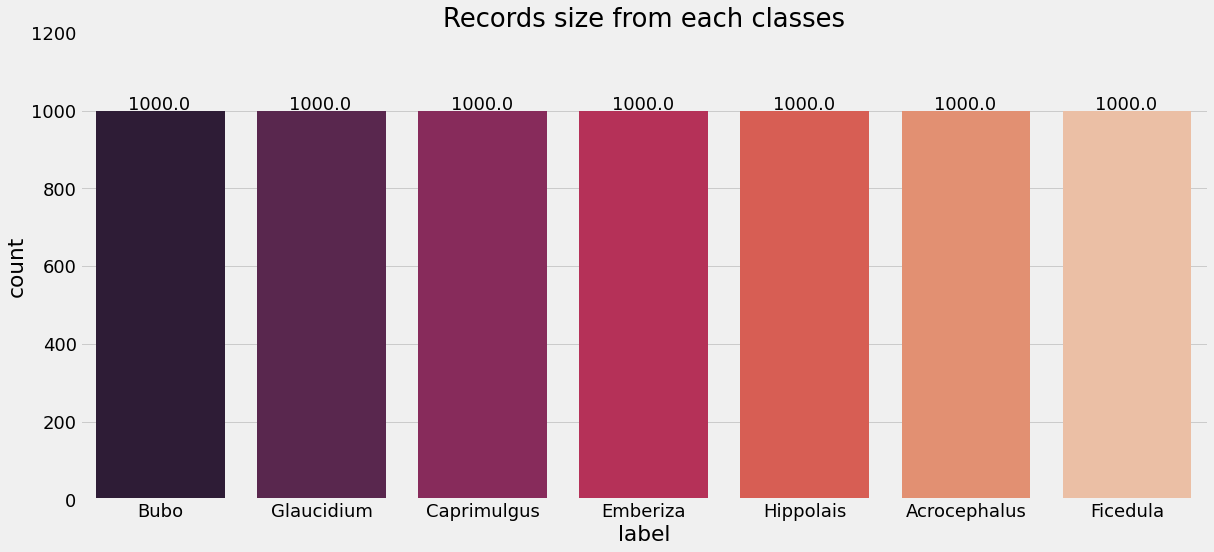

In [19]:
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.rcParams["font.size"]=18
    ax=sns.countplot(x="label",data=df, palette="rocket")
    plt.title(label="Records size from each classes")
    plt.ylim(0,1200)
    for p in ax.patches:
        ax.annotate((p.get_height()),(p.get_x()+0.20,p.get_height()+3))
    plt.show()

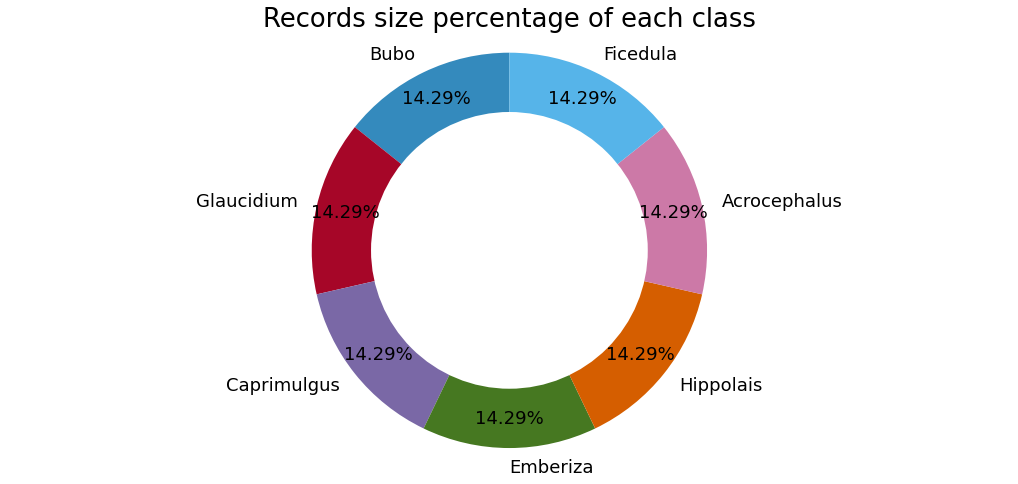

In [20]:
chart_data = dict(df['label'].value_counts())

with plt.style.context(style="bmh"):
    plt.figure(figsize=(18, 8))
    plt.rcParams["font.size"] = 18
    plt.pie(x=chart_data.values(), labels=chart_data.keys(), autopct="%.2f%%", startangle=90, pctdistance=0.85)
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.axis('equal')
    plt.title(label="Records size percentage of each class")
    plt.show()

In [21]:
X = df.drop(labels="label", axis=1)
X.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.722945,0.021809,782.008349,1978.229014,1125.701526,0.006035,-523.148193,96.268906,28.690178,4.405442,...,9.775922,12.035838,8.920496,9.337797,7.045212,10.037899,10.380515,12.840583,9.224757,8.849692
1,0.434243,0.027468,1600.881218,1753.066660,2579.434403,0.105189,-249.545807,142.545990,-30.038950,-0.492821,...,-9.891302,-2.485001,-6.048676,2.062572,-3.262909,4.100702,1.528757,4.483550,-4.216656,1.896721
2,0.546560,0.001505,3165.301823,2541.225555,6128.629608,0.214851,-606.303223,49.975445,-39.488728,-6.530748,...,-13.764547,-7.282796,-4.553179,-0.973836,-3.703149,1.529024,-2.320423,-1.072175,-1.310206,4.238943
3,0.603204,0.014359,3219.819285,2551.422393,6025.346899,0.152784,-503.610138,15.812575,27.213356,51.788803,...,7.481935,11.002545,4.151493,13.477655,5.556241,7.734437,8.195439,6.143351,5.869843,6.933216
4,0.238403,0.059515,4033.487599,2006.441246,5514.816653,0.346657,-261.228577,12.840778,-27.521315,25.908644,...,-5.422714,26.376385,-10.839603,17.662899,-7.284698,-2.170884,9.891982,-1.822561,3.936774,10.600945


In [22]:
y = df[["label"]]
y.head()

,label
0,Bubo
1,Glaucidium
2,Caprimulgus
3,Emberiza
4,Caprimulgus


In [23]:
scaler = StandardScaler()
scaler = scaler.fit(X.values)
scaled_X = scaler.transform(X.values)

df = pd.DataFrame(scaled_X, columns=X.columns)
df['label'] = y.values.ravel()

df.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,2.007548,0.080431,-2.112352,-0.282223,-2.286774,-1.733209,-1.024739,0.900451,1.151928,-0.441660,...,1.025926,1.139899,0.728641,0.973845,1.149159,1.880187,2.316867,2.122394,1.444507,Bubo
1,-0.302894,0.391007,-1.273390,-0.724198,-1.400273,-0.808061,1.634507,1.763823,-0.076754,-0.597694,...,-0.811904,-0.775372,-0.303058,-0.594244,-0.022621,0.207790,0.414967,-0.697635,-0.481503,Glaucidium
2,0.595967,-1.033858,0.329410,0.822892,0.764060,0.215137,-1.832955,0.036773,-0.274455,-0.790031,...,-1.419136,-0.584027,-0.733651,-0.661214,-0.530173,-0.519451,-0.849409,-0.087857,0.167305,Caprimulgus
3,1.049276,-0.328432,0.385265,0.842907,0.701077,-0.363975,-0.834842,-0.600590,1.121031,1.067734,...,0.895148,0.529716,1.315713,0.747341,0.694542,1.467352,0.792705,1.418528,0.913633,Emberiza
4,-1.870180,2.149731,1.218895,-0.226845,0.389751,1.444940,1.520958,-0.656034,-0.024082,0.243324,...,2.840937,-1.388360,1.909222,-1.206045,-1.260396,1.787886,-1.020183,1.012967,1.929613,Caprimulgus


In [24]:
with open(file="models/Scaler.pkl", mode="wb") as file:
    pickle.dump(obj=scaler, file=file)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   chroma_stft         7000 non-null   float64
 1   rmse                7000 non-null   float64
 2   spectral_centroid   7000 non-null   float64
 3   spectral_bandwidth  7000 non-null   float64
 4   rolloff             7000 non-null   float64
 5   zero_crossing_rate  7000 non-null   float64
 6   mfcc1               7000 non-null   float64
 7   mfcc2               7000 non-null   float64
 8   mfcc3               7000 non-null   float64
 9   mfcc4               7000 non-null   float64
 10  mfcc5               7000 non-null   float64
 11  mfcc6               7000 non-null   float64
 12  mfcc7               7000 non-null   float64
 13  mfcc8               7000 non-null   float64
 14  mfcc9               7000 non-null   float64
 15  mfcc10              7000 non-null   float64
 16  mfcc11

In [26]:
class_dict = {}

for idx, label in enumerate(class_labels):
    class_dict[label] = idx
    
print(class_dict)

{'Acrocephalus': 0, 'Bubo': 1, 'Caprimulgus': 2, 'Emberiza': 3, 'Ficedula': 4, 'Glaucidium': 5, 'Hippolais': 6}


In [27]:
df['label'] = df['label'].map(class_dict)
df.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,2.007548,0.080431,-2.112352,-0.282223,-2.286774,-1.733209,-1.024739,0.900451,1.151928,-0.441660,...,1.025926,1.139899,0.728641,0.973845,1.149159,1.880187,2.316867,2.122394,1.444507,1
1,-0.302894,0.391007,-1.273390,-0.724198,-1.400273,-0.808061,1.634507,1.763823,-0.076754,-0.597694,...,-0.811904,-0.775372,-0.303058,-0.594244,-0.022621,0.207790,0.414967,-0.697635,-0.481503,5
2,0.595967,-1.033858,0.329410,0.822892,0.764060,0.215137,-1.832955,0.036773,-0.274455,-0.790031,...,-1.419136,-0.584027,-0.733651,-0.661214,-0.530173,-0.519451,-0.849409,-0.087857,0.167305,2
3,1.049276,-0.328432,0.385265,0.842907,0.701077,-0.363975,-0.834842,-0.600590,1.121031,1.067734,...,0.895148,0.529716,1.315713,0.747341,0.694542,1.467352,0.792705,1.418528,0.913633,3
4,-1.870180,2.149731,1.218895,-0.226845,0.389751,1.444940,1.520958,-0.656034,-0.024082,0.243324,...,2.840937,-1.388360,1.909222,-1.206045,-1.260396,1.787886,-1.020183,1.012967,1.929613,2


In [28]:
X = df.drop(labels="label", axis=1)
X.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,2.007548,0.080431,-2.112352,-0.282223,-2.286774,-1.733209,-1.024739,0.900451,1.151928,-0.441660,...,1.282846,1.025926,1.139899,0.728641,0.973845,1.149159,1.880187,2.316867,2.122394,1.444507
1,-0.302894,0.391007,-1.273390,-0.724198,-1.400273,-0.808061,1.634507,1.763823,-0.076754,-0.597694,...,-0.782139,-0.811904,-0.775372,-0.303058,-0.594244,-0.022621,0.207790,0.414967,-0.697635,-0.481503
2,0.595967,-1.033858,0.329410,0.822892,0.764060,0.215137,-1.832955,0.036773,-0.274455,-0.790031,...,-1.188815,-1.419136,-0.584027,-0.733651,-0.661214,-0.530173,-0.519451,-0.849409,-0.087857,0.167305
3,1.049276,-0.328432,0.385265,0.842907,0.701077,-0.363975,-0.834842,-0.600590,1.121031,1.067734,...,1.041986,0.895148,0.529716,1.315713,0.747341,0.694542,1.467352,0.792705,1.418528,0.913633
4,-1.870180,2.149731,1.218895,-0.226845,0.389751,1.444940,1.520958,-0.656034,-0.024082,0.243324,...,-0.312954,2.840937,-1.388360,1.909222,-1.206045,-1.260396,1.787886,-1.020183,1.012967,1.929613


In [29]:
y = df[["label"]]
y.head()

,label
0,1
1,5
2,2
3,3
4,2


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5600, 26) (1400, 26) (5600, 1) (1400, 1)


In [31]:
X_train.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
2914,-0.373735,-0.543831,1.295009,0.058909,0.916827,1.255035,-1.382992,-1.044068,-0.211355,-0.129023,...,1.034005,0.169110,-0.425325,-1.429962,0.384971,-0.661675,0.020823,0.546574,-1.049811,-2.227644
5141,-1.171488,-0.213452,-1.028681,-1.351766,-1.641807,-0.557869,0.424744,1.364377,-0.822490,-1.204932,...,-0.607823,0.301981,2.033777,-0.636606,-1.033362,-0.732536,-0.766305,-0.867931,0.557602,0.781155
3024,0.850964,0.112918,0.380091,0.621110,0.466917,-0.296466,-0.741878,-0.498304,1.336591,1.044274,...,0.879125,0.179353,0.667587,0.991950,1.199450,0.934524,2.455034,1.023774,1.220419,0.850808
5710,-0.373735,-0.543831,1.295009,0.058909,0.916827,1.255035,-1.382992,-1.044068,-0.211355,-0.129023,...,1.034005,0.169110,-0.425325,-1.429962,0.384971,-0.661675,0.020823,0.546574,-1.049811,-2.227644
2359,-0.783686,0.314320,0.364082,-1.133215,-0.300844,0.610885,0.428276,-1.006722,-2.194283,-1.097149,...,0.414296,1.195521,1.096486,1.723997,0.794209,0.611817,-0.077284,0.120355,-0.214633,-0.136952


In [32]:
y_train.head()

,label
2914,5
5141,2
3024,3
5710,5
2359,6


In [33]:
X_test.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
4464,-0.055877,-0.793988,0.414757,-0.267827,0.106877,0.741708,0.305134,0.099880,-0.218391,1.362559,...,0.261777,0.391722,-0.562478,0.192899,-0.010240,-0.172493,-0.415604,0.856150,-0.580455,0.121196
686,-0.709915,-0.046078,0.050558,-0.465216,-0.223302,0.397341,0.752501,0.077610,-0.779228,0.602634,...,0.250875,-0.243635,-0.626883,-0.014167,-0.029307,-1.270040,-0.368611,0.020920,0.102889,-0.993220
5311,-1.340797,1.095181,0.719629,-0.818908,0.154173,0.838073,-0.643431,-1.592210,-0.675200,0.564236,...,0.431170,0.125693,-0.722754,-0.541376,0.418042,-0.012918,-1.089063,-0.521001,1.220004,-0.814121
3576,-0.379776,-0.099870,1.174512,-0.260245,0.580488,1.493934,1.036401,-0.778724,-0.363121,0.461912,...,-0.524999,-0.410282,-0.403656,-0.081180,-0.666789,-0.810492,-0.325911,0.490839,-0.955330,0.203396
4820,-0.597943,0.228326,0.087577,-0.627073,-0.267828,-0.034996,0.445092,-0.579179,-0.796683,1.766248,...,0.838185,0.535970,0.831016,0.789880,1.750501,1.178959,0.306791,1.616978,0.750430,0.175823


In [34]:
y_test.head()

,label
4464,0
686,0
5311,0
3576,6
4820,0


In [35]:
X_train.to_csv("splitted_data/X_train.csv", index=False)
X_test.to_csv("splitted_data/X_test.csv", index=False)
y_train.to_csv("splitted_data/y_train.csv", index=False)
y_test.to_csv("splitted_data/y_test.csv", index=False)

---